MANTILLA Omar Augusto

In [51]:
# Loadinf Libraries

library('tree')
library('ISLR')
library('randomForest')
library('gbm')

Chapter 8 Exercise 3

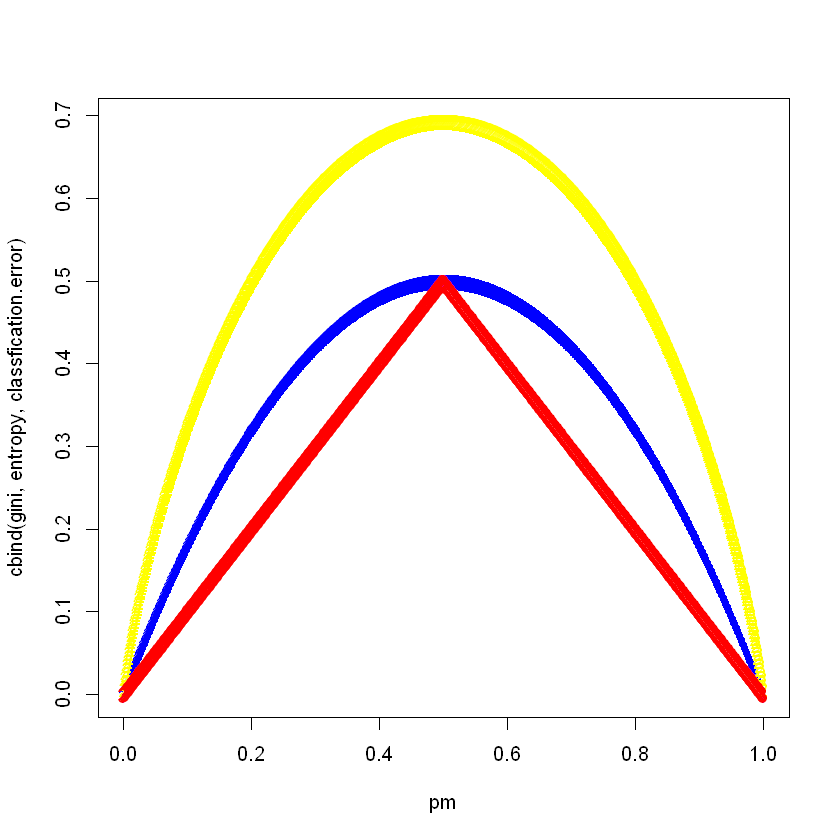

In [52]:
### Defininf Pm Sequence

pm = seq(0, 1, by=0.001)

# Gini

gini = pm * (1 - pm) * 2

# Entropy

entropy = -(pm * log(pm) + (1 - pm) * log(1 - pm))

# Classification Error

classfication.error = 1 - pmax(pm, 1 - pm)

# Matplotting

matplot(pm, cbind(gini, entropy, classfication.error), col = c("blue", "yellow", "red"))

Chapter 8 Exercise 5

In [53]:
# Bootstrapped samples

pro = c(0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7,0.75)

In [54]:
# Average

mean(pro)

[1] 0.45

In [55]:
# Majority

sum(pro >= 0.5) > sum(pro < 0.5)

[1] TRUE

Chapter 8 Exercise 8

In [56]:
# Loading Dataset
attach(Carseats)
set.seed(1)

The following objects are masked from Carseats (pos = 5):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US




A)

In [57]:
# Splitting the dataset

train=sample(dim(Carseats)[1],dim(Carseats)[1]/2)
carseat.train= Carseats[train,]
carseat.test=Carseats[-train,]

B)

In [58]:
# Building the model

cars.tree= tree(Sales~ ., data=carseat.train)
summary(cars.tree)



Regression tree:
tree(formula = Sales ~ ., data = carseat.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 

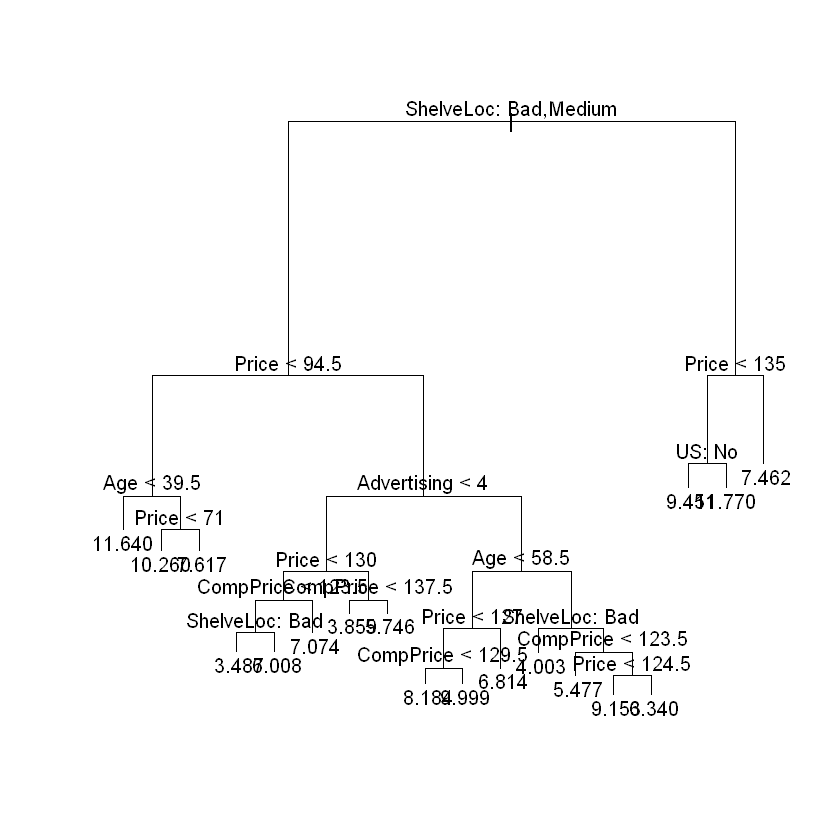

In [59]:
# Plotting the model

plot(cars.tree)
text(cars.tree, pretty=0)

In [60]:
# Prediction
cars.pred= predict(cars.tree, carseat.test)
mean((carseat.test$Sales - cars.pred)^2)

# MSE is 4.92

[1] 4.922039

C)

In [61]:
# Cross-Validation
cars.cv=cv.tree(cars.tree, FUN=prune.tree)
par(mfrow = c(1,2))


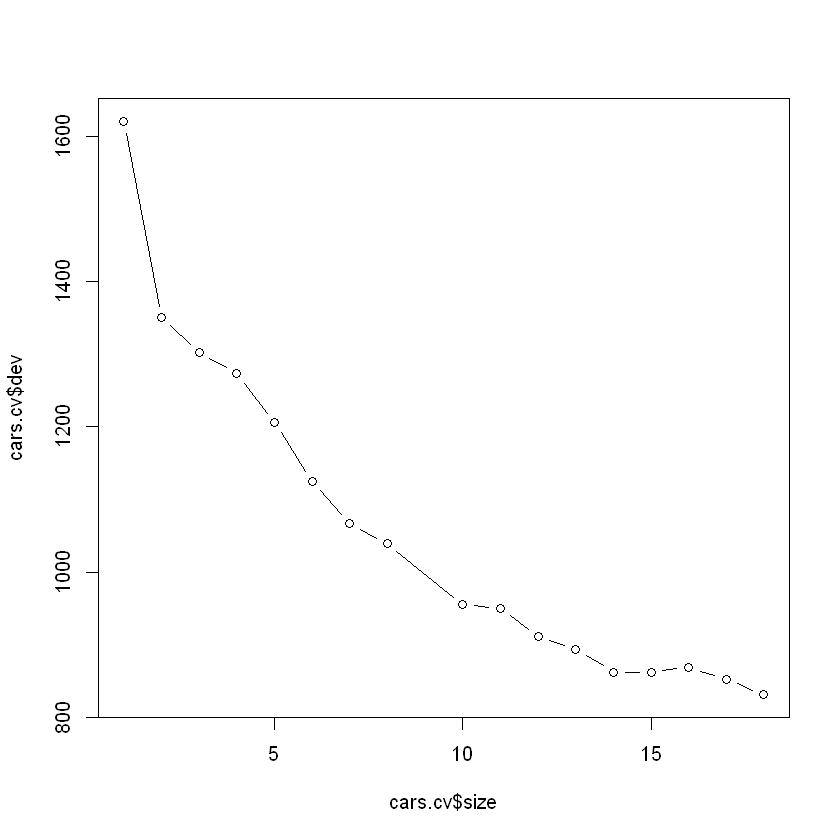

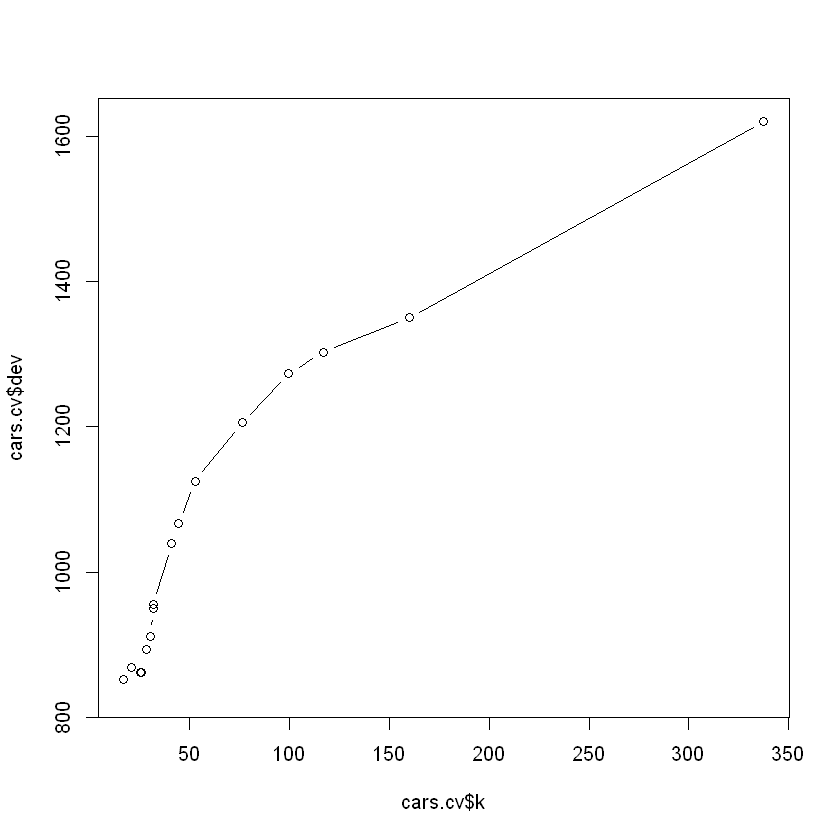

In [62]:
# Plotting
plot(cars.cv$size, cars.cv$dev, type = "b")
plot(cars.cv$k, cars.cv$dev, type = "b")

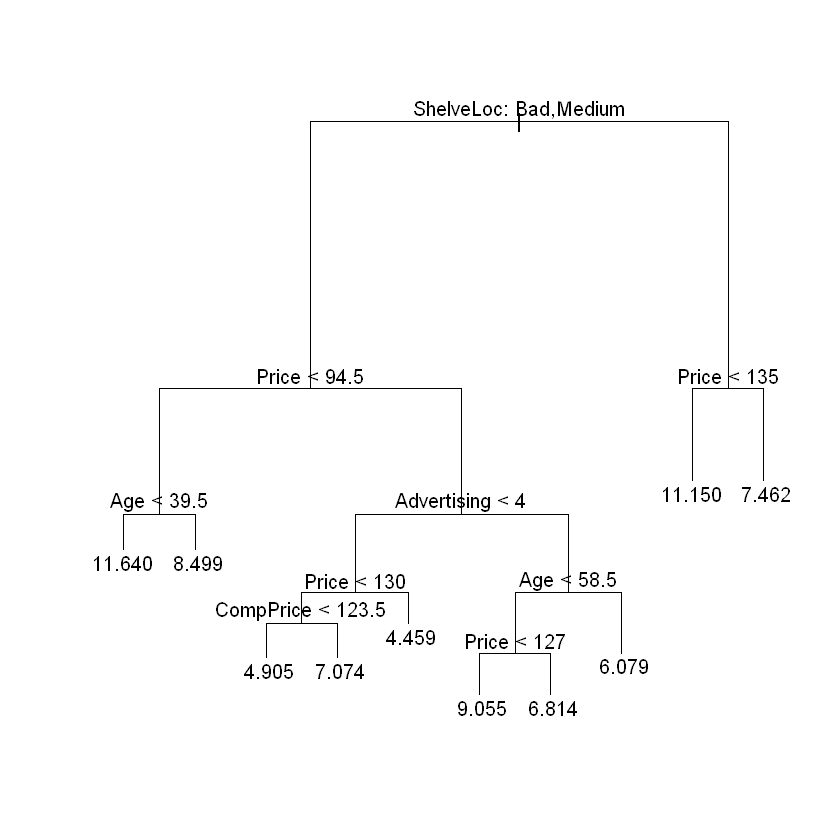

In [63]:
# 10
car.pruned = prune.tree(cars.tree, best = 10)
par(mfrow = c(1, 1))
plot(car.pruned)
text(car.pruned, pretty = 0)

In [64]:
# Prediction
pruned.pred = predict(car.pruned, carseat.test)
mean((carseat.test$Sales - pruned.pred)^2)
# MSE decreased = 4.91 

[1] 4.918134

D)

In [65]:
cars.bag = randomForest(Sales ~ ., data = carseat.train, mtry = 10, ntree = 500, importance = T)

In [66]:
pred.bag = predict(cars.bag, carseat.test)
mean((carseat.test$Sales - pred.bag)^2)

[1] 2.657296

In [67]:
importance(cars.bag)

,%IncMSE,IncNodePurity
CompPrice,23.07909904,171.185734
Income,2.82081527,94.079825
Advertising,11.43295625,99.098941
Population,-3.92119532,59.818905
Price,54.24314632,505.887016
ShelveLoc,46.26912996,361.962753
Age,14.24992212,159.740422
Education,-0.07662320,46.738585
Urban,0.08530119,8.453749
US,4.34349223,15.157608


In [68]:
# MSE is improved to 2.62, 
# Important Predictors: Price and ShelveLoc are the most important

E)

In [69]:
cars.rf = randomForest(Sales ~ ., data = carseat.train, mtry = 5, ntree = 500, importance = T)
pred.rf = predict(cars.rf, carseat.test)
mean((carseat.test$Sales - pred.rf)^2)
# MSE increase : 2.71

[1] 2.701665

In [70]:
# Importance
importance(cars.rf)
# Importance Price and ShelveLoc

,%IncMSE,IncNodePurity
CompPrice,19.8160444,162.73603
Income,2.8940268,106.96093
Advertising,11.6799573,106.30923
Population,-1.6998805,79.04937
Price,46.3454015,448.33554
ShelveLoc,40.4412189,334.33610
Age,12.5440659,169.06125
Education,1.0762096,55.87510
Urban,0.5703583,13.21963
US,5.8799999,25.59797


Chapter 8 Exercise 9

A)

In [71]:
attach(OJ)
set.seed(1)

train = sample(dim(OJ)[1], 800)
oj.train = OJ[train,]
oj.test = OJ[-train,]

The following objects are masked from OJ (pos = 5):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase




B)

In [72]:
oj.tree = tree(Purchase ~ ., data = oj.train)
summary(oj.tree)


Classification tree:
tree(formula = Purchase ~ ., data = oj.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

In [73]:
# The tree has 9 nodes and 5 variables LoyalCH, PriceDiff, SpecialCH, ListPriceDiff and PctDiscMM
# Training Error: 0.1588

C)

In [74]:
oj.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1073.00 CH ( 0.60625 0.39375 )  
   2) LoyalCH < 0.5036 365  441.60 MM ( 0.29315 0.70685 )  
     4) LoyalCH < 0.280875 177  140.50 MM ( 0.13559 0.86441 )  
       8) LoyalCH < 0.0356415 59   10.14 MM ( 0.01695 0.98305 ) *
       9) LoyalCH > 0.0356415 118  116.40 MM ( 0.19492 0.80508 ) *
     5) LoyalCH > 0.280875 188  258.00 MM ( 0.44149 0.55851 )  
      10) PriceDiff < 0.05 79   84.79 MM ( 0.22785 0.77215 )  
        20) SpecialCH < 0.5 64   51.98 MM ( 0.14062 0.85938 ) *
        21) SpecialCH > 0.5 15   20.19 CH ( 0.60000 0.40000 ) *
      11) PriceDiff > 0.05 109  147.00 CH ( 0.59633 0.40367 ) *
   3) LoyalCH > 0.5036 435  337.90 CH ( 0.86897 0.13103 )  
     6) LoyalCH < 0.764572 174  201.00 CH ( 0.73563 0.26437 )  
      12) ListPriceDiff < 0.235 72   99.81 MM ( 0.50000 0.50000 )  
        24) PctDiscMM < 0.196197 55   73.14 CH ( 0.61818 0.38182 ) *
        25) PctDiscMM > 0.196197 17   12.32 M

8) LoyalCH < 0.0356415 59   10.14 MM ( 0.01695 0.98305 ) *
The variable to split it is LoyalCH in less that 0.0356415.
n=59 obeservations.
deviance = 10.14
The value yprob is MM 0.01695 and the remaining is 0.98305
* denotes terminal node



D)

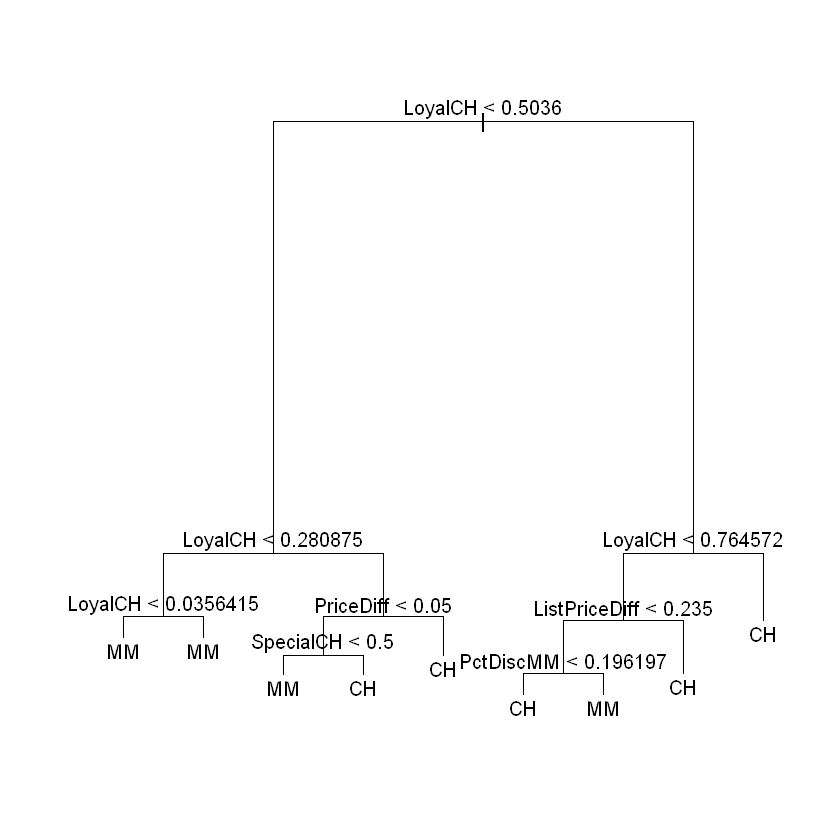

In [75]:
plot(oj.tree)
text(oj.tree, pretty = 1)

LoyalCH is the main variable in 4 nodes.

E)

In [76]:
oj.pred = predict(oj.tree, oj.test, type = "class")
table(oj.test$Purchase, oj.pred)

    oj.pred
      CH  MM
  CH 160   8
  MM  38  64

F)

In [77]:
cv.oj = cv.tree(oj.tree, FUN = prune.tree)

G)

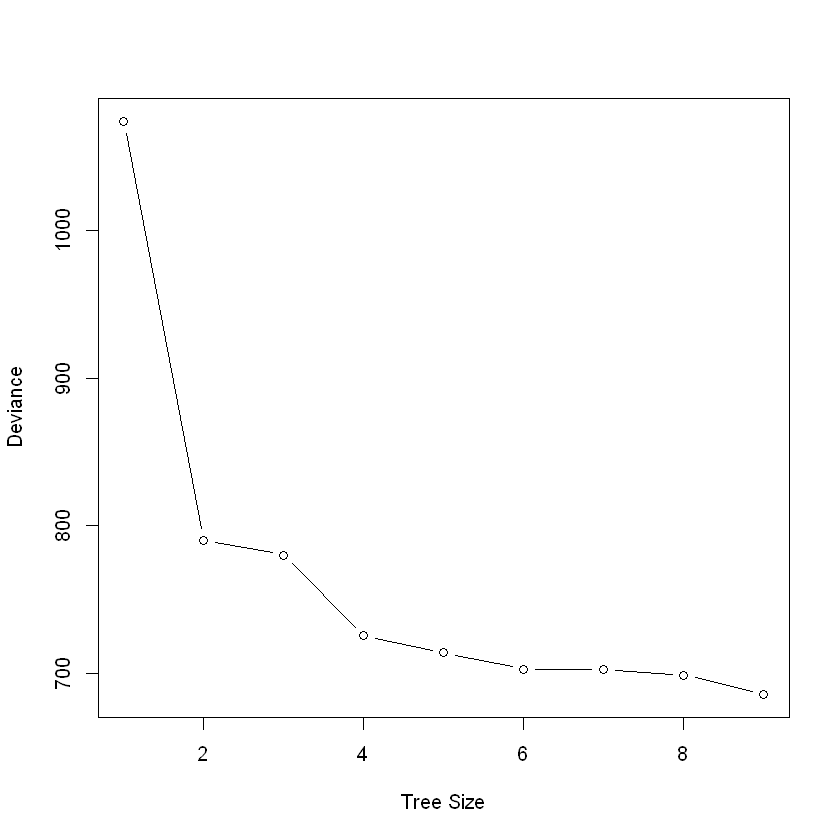

In [78]:
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree Size", ylab = "Deviance")

H)

The Cross validation error it is low with the 6

I)

In [79]:
oj.pruned = prune.tree(oj.tree, best = 6)

J)

In [80]:
summary(oj.pruned)


Classification tree:
snip.tree(tree = oj.tree, nodes = c(10L, 4L, 12L))
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff"
Number of terminal nodes:  6 
Residual mean deviance:  0.7919 = 628.8 / 794 
Misclassification error rate: 0.1788 = 143 / 800 

K)

In [81]:
pruned.pred= predict(oj.pruned, oj.test, type = "class")
misclass.pruned= sum(oj.test$Purchase != pruned.pred)
misclass.pruned/length(pruned.pred)

[1] 0.1851852

In [82]:
unpruned.pred= predict(oj.tree, oj.test, type = "class")
misclass.unpruned= sum(oj.test$Purchase != unpruned.pred)
misclass.unpruned/length(unpruned.pred)

[1] 0.1703704

Chapter 8 Exercise 10

A)

In [83]:
data(Hitters)

In [84]:
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N


In [85]:
hitters= Hitters[-which(is.na(Hitters$Salary)),]
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A


In [86]:
hitters$Salary = log(hitters$Salary)
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,4.248495,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,4.605170,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,4.317488,N
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,7.003065,A


B)

In [87]:
train= 1:200
hitters.train= Hitters[train,]
hitters.test= Hitters[-train,]

C)

In [88]:
set.seed(1)

D)

E)

F)

G)